3.7530864197530867
0.01234567901234568
1.67375


C:\Users\pheng\AppData\Local\Temp\ipykernel_32300\3355514720.py:51: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


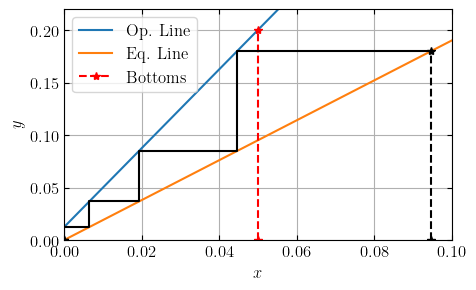

0.09476607863740477


In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import root_scalar

# Inputs
x_0 = 0
x_N = 0.05
y_N1 = 0.20
K = 1.90

y1 = 0.05*y_N1/(1-0.95*y_N1)
b = y1
a = (y_N1-y1)/(x_N-x_0)
q_min = (K*x_N-y1)/(x_N*(1-y1))
#a = q_min
#a = (y_N1-y1)/(x_N-x_0)
print(a)
print(b)
print(q_min)

x = np.linspace(0,1,5)

def op_line(x,a,b): return a*x + b

def stepping_x(x_0,x_N,a,b,K):
    
    x_n = x_0
    y_n = op_line(x_0,a,b)
    
    y_0 = op_line(x_0,K,0)
    
    x_eq = [x_0,x_0]
    y_eq = [y_0,y_n]
    
    for i in range(50):
        sol = root_scalar(lambda x: y_n-op_line(x,K,0),method='secant',x0=x_n)
        x_n = sol.root
        y_n = op_line(x_n,a,b)
        
        x_eq = np.hstack((x_eq,[x_n,x_n]))
        y_eq = np.hstack((y_eq,[op_line(x_n,K,0),op_line(x_n,a,b)]))
        
        if x_n > x_N:
            break
    
    return x_eq, y_eq

x_eq, y_eq = stepping_x(x_0,x_N,a,b,K)

# Plot results
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (5,3)
plt.rc('text', usetex=True)


font = {'family' : 'serif',
         'size'   : 12,
         'serif':  'cmr10'
         }

plt.rc('font', **font)


plt.plot(x,op_line(x,a,b),label='Op. Line')
plt.plot(x,op_line(x,K,0),label='Eq. Line')
plt.plot([x_N,x_N],[0,op_line(x_N,a,b)],color='r',linestyle='--',marker='*',label='Bottoms')

plt.plot(x_eq[0:-1],y_eq[0:-1],color=[0,0,0])
plt.plot([x_eq[0],x_eq[0]],[0,y_eq[0]],color=[0,0,0],linestyle='--',marker='*')
plt.plot([x_eq[-1],x_eq[-1]],[0,y_eq[-2]],color=[0,0,0],linestyle='--',marker='*')



plt.legend(loc='best')
plt.xlabel('$x$',fontfamily='Serif')
plt.ylabel('$y$',fontfamily='Serif')
plt.xlim([0,0.1])
plt.ylim([0,0.22])
plt.grid('on')
plt.tick_params(top='true',right='true',direction='in')

plt.show()

print(x_eq[-1])

fig.savefig('CHEN_3100_HW_2.png',dpi=600,bbox_inches='tight')
#fig.savefig('CHEN_3100_HW_2_2_1.png',dpi=600,bbox_inches='tight')

In [6]:
VN1 = 100
LN = 0.95*y_N1*VN1/x_N
L0 = (1-x_N)*LN
V1 = L0 + VN1 - LN

A1 = L0/(K*V1)
AN = LN/(K*VN1)

A = (A1*AN)**0.5

def kremser(yn1,y1,x0,K,A): return np.log((yn1-K*x0)/(y1-K*x0)*(1-1/A)+1/A)/np.log(A)

N = kremser(y_N1,y1,x_0,K,A)

print(LN)
print(A)
print(N)

380.0
2.165954298846436
2.8689226863837027
